Домашняя работа по теме "Корреляция и корреляционный анализ"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Описание датасета:

Содержатся данные по средней годовой смертности на 100 000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

In [ ]:
water = pd.read_csv('water.csv', header=0, names=['location',	'town',	'mortality',	'hardness'])
water.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


In [ ]:
water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ KB


**Задание 1.** Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

*   Построить точечный график
*   Рассчитать коэффициенты корреляции Пирсона и Спирмена
*   Построить модель линейной регрессии
*   Рассчитать коэффициент детерминации
*   Вывести график остатков

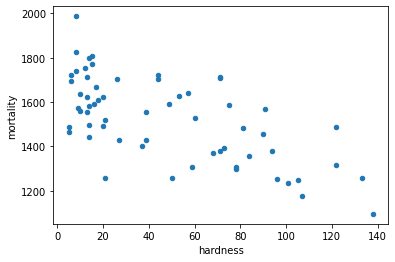

In [ ]:
water.plot(kind='scatter', x='hardness', y='mortality')
# с увеличением количества кальция в воде снижается смерность населения

In [ ]:
water[['hardness', 'mortality']].corr()
# обратная связь, чуть сильнее среднего

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:
X = water[['hardness']]
y = water['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# коэффициент детерминации
model.score(X_test, y_test)

0.49106950945304184

In [ ]:
y_pred = model.predict(X_test)

(array([1., 1., 1., 3., 1., 3., 2., 1., 2., 1.]),
 array([-256.82313194, -204.55188078, -152.28062963, -100.00937847,
         -47.73812731,    4.53312385,   56.80437501,  109.07562617,
         161.34687733,  213.61812848,  265.88937964]),
 <a list of 10 Patch objects>)

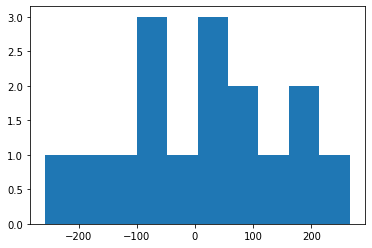

In [ ]:
# график остатков
plt.hist(y_test - y_pred)

Низкое значение коэффициента детерминации говорит о низком качестве модели. Анализ остатков также показывает, что регрессионная модель некорректно описывает зависимость данных.

Вывод: Данных о жесткости воды недостаточно для прогнозирования уровня смертности

**Задание 2.** Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы.
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности.

Южные города

In [ ]:
south_water = water[water['location'] == 'South']
south_water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   26 non-null     object
 1   town       26 non-null     object
 2   mortality  26 non-null     int64 
 3   hardness   26 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.0+ KB


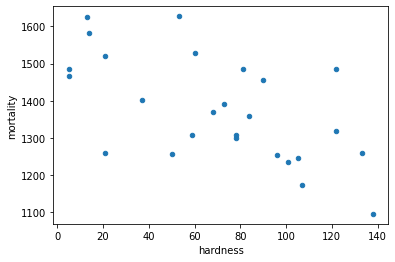

In [ ]:
south_water.plot(kind='scatter', x='hardness', y='mortality')

In [ ]:
south_water[['hardness', 'mortality']].corr()
# для южных городов обратная связь и сила корреляции сохраняется

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
south_water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
s_X = south_water[['hardness']]
s_y = south_water['mortality']
s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(s_X, s_y, test_size=0.2, random_state=6)

In [ ]:
s_model = LinearRegression()
s_model.fit(s_X_train, s_y_train)

LinearRegression()

In [ ]:
# коэффициент детерминации
s_model.score(s_X_test, s_y_test)

0.5146353051032384

In [ ]:
s_y_pred = s_model.predict(s_X_test)

(array([3., 0., 1., 0., 1., 0., 0., 0., 0., 1.]),
 array([-71.17768538, -41.72552162, -12.27335787,  17.17880588,
         46.63096964,  76.08313339, 105.53529715, 134.9874609 ,
        164.43962466, 193.89178841, 223.34395217]),
 <a list of 10 Patch objects>)

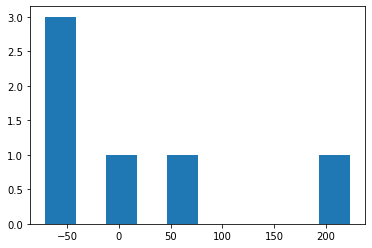

In [ ]:
# график остатков
plt.hist(s_y_test - s_y_pred)

Северные города

In [ ]:
north_water = water[water['location'] == 'North']
north_water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 2 to 61
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   35 non-null     object
 1   town       35 non-null     object
 2   mortality  35 non-null     int64 
 3   hardness   35 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


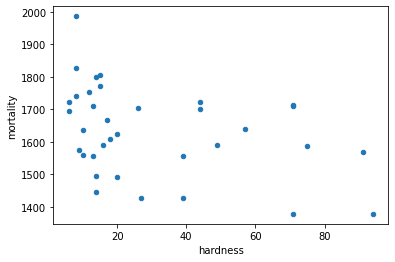

In [ ]:
north_water.plot(kind='scatter', x='hardness', y='mortality')

In [ ]:
north_water[['hardness', 'mortality']].corr()
# для северных городов обратная связь сохраняется, но сила корреляции почти вдвое слабее

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
north_water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
n_X = north_water[['hardness']]
n_y = north_water['mortality']
n_X_train, n_X_test, n_y_train, n_y_test = train_test_split(n_X, n_y, test_size=0.25, random_state=6)

In [ ]:
n_model = LinearRegression()
n_model.fit(n_X_train, n_y_train)

LinearRegression()

In [ ]:
# коэффициент детерминации
n_model.score(n_X_test, n_y_test)
# такая регрессионная модель не подходит для описания зависимостей в данных по северным городам

-0.023884187917386335

In [ ]:
n_y_pred = n_model.predict(n_X_test)
# предсказание модели будет некорректным

(array([2., 1., 0., 0., 0., 1., 2., 1., 1., 1.]),
 array([-175.29748715, -143.28709865, -111.27671015,  -79.26632165,
         -47.25593314,  -15.24554464,   16.76484386,   48.77523236,
          80.78562086,  112.79600937,  144.80639787]),
 <a list of 10 Patch objects>)

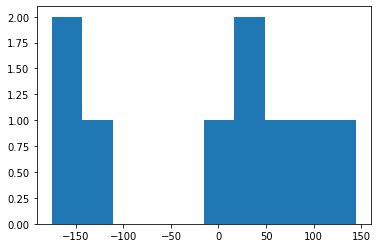

In [ ]:
# график остатков
plt.hist(n_y_test - n_y_pred)

Для южных городов аналогичная зависимость сохраняется, для северных - нет.

Вывод: для построения качественной регрессионной модели нужно больше данных и более детальный анализ зависимостей в них

Домашняя работа выполнена.